# logistic regression
3. ใช้ logistic regression แก้ปัญหา handwritten digit recognition จากชุดข้อมูล MNIST โดยทำ 2 แบบจำลอง คือ binary classification และ multi-class classification โดย binary classification ให้เลือกข้อมูลออกมาสอง class เช่น classify รูปเลข 0 และ 1 เป็นต้น ขณะที่ multi-class classification ให้ classify เลข 0-9 ออกจากกันให้ได้ ทั้งสองแบบจำลองให้นำ weight มา plot เป็นรูปเพื่อแสดงความเข้าใจการทำงานของ weight ด้วย

In [313]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Sigmoid function
$$ g(z) = \frac{1}{1 + e^{-z}} $$


In [314]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# test function
sigmoid(0)

0.5

สมมติฐาน (Hypothesis)
$$ h_θ(x) = g(θ_0x_0 + θ_1x_1 + θ_2x_2) $$


In [315]:
def hypothesis(w, X):
    H = sigmoid(np.dot(X, w))
    return H


# test function
hypothesis(np.array([0, 0, 0]), np.array(
    [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]))

array([0.5, 0.5, 0.5, 0.5])

Cost function
$$ J(θ) = \frac{1}{m} [−y^Tlog(h_θ(x)) − (1 − y)^Tlog(1 − h_θ(x))] $$


In [316]:
def Cost(H, Y):
    cost = -np.sum(Y*np.log(H) + (1-Y)*np.log(1-H))/len(Y)
    return cost


# test function
Cost(np.array([0.5, 0.5, 0.5, 0.5]), np.array([0, 0, 0, 1]))

0.6931471805599453

Gradient
$$ \frac{∂}{∂θ*j}J(θ) = \frac{1}{m}X^T(h*θ(x) − y) $$

Gradient descent
$$ θ*j ≔ θ_j-\frac{a}{m}X^T(h*θ(x) − y) $$


In [317]:
def gradientDescent(x, y, theta, learning_rate, iterations, show):
    cost_history = []
    theta_n = np.copy(theta)
    theta_history = []
    for epoch in range(iterations):
        H = hypothesis(theta_n, x)
        cost = Cost(H, y)
        gradient = np.dot(x.T, (H-y))/len(y)
        theta_n -= learning_rate * gradient
        theta_history.append(list(theta_n))
        cost_history.append(cost)
        if show:
            print(f"Epoch {epoch+1}/{iterations}:  CE: {cost:.10f}")

    return theta_n, cost_history, np.array(theta_history)


# test function
gradientDescent(
    np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]),
    np.array([0, 0, 0, 1]),
    np.array([0, 0, 0], dtype='float64'), 1, 1, True)

Epoch 1/1:  CE: 0.6931471806


(array([-0.25,  0.  ,  0.  ]),
 [0.6931471805599453],
 array([[-0.25,  0.  ,  0.  ]]))

โหลดชุดข้อมูล

In [331]:
(trainX, trainy), (_, _) = mnist.load_data()

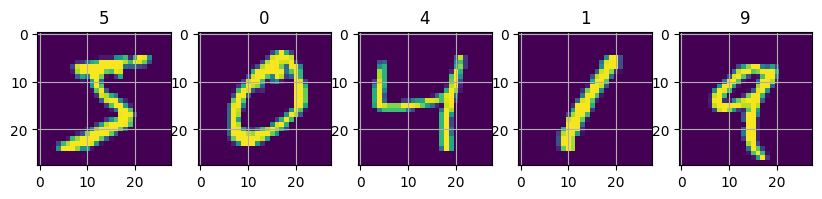

In [377]:
n = 5
fig, axs = plt.subplots(1, n, figsize=(10, 3))
for ax, x,y in zip(axs, trainX[:n], trainy[:n]):
    ax.imshow(x)
    ax.set_title(y)
    ax.grid(True)
plt.show()

เตรียมข้อมูล
* เลือกข้อมูลในแต่ละ class มาอย่างละ 100 ตัวอย่าง
* แปลง 28*28 ให้เป็นเวคเตอร์ 784 
* เพิ่ม w0 เท่ากับ 1 ในทุกข้อมูลตัวอย่าง

In [382]:
n = 100
D0,D1,D2,D3,D4,D5,D6,D7,D8,D9 = [],[],[],[],[],[],[],[],[],[]

for x, y in zip(trainX, trainy):
    if y == 0:
        if len(D0) < n:
            D0.append((x.reshape(28*28, 1) / 255))
    elif y == 1:
        if len(D1) < n:
            D1.append(x.reshape(28*28, 1) / 255)
    elif y == 2:
        if len(D2) < n:
            D2.append(x.reshape(28*28, 1) / 255)
    elif y == 3:
        if len(D3) < n:
            D3.append(x.reshape(28*28, 1) / 255)
    elif y == 4:
        if len(D4) < n:
            D4.append(x.reshape(28*28, 1) / 255)
    elif y == 5:
        if len(D5) < n:
            D5.append(x.reshape(28*28, 1) / 255)
    elif y == 6:
        if len(D6) < n:
            D6.append(x.reshape(28*28, 1) / 255)
    elif y == 7:
        if len(D7) < n:
            D7.append(x.reshape(28*28, 1) / 255)
    elif y == 8:
        if len(D8) < n:
            D8.append(x.reshape(28*28, 1) / 255)
    elif y == 9:
        if len(D9) < n:
            D9.append(x.reshape(28*28, 1) / 255)

    if (
        len(D0) == n and
        len(D1) == n and
        len(D2) == n and
        len(D3) == n and
        len(D4) == n and
        len(D5) == n and
        len(D6) == n and
        len(D7) == n and
        len(D8) == n and
        len(D9) == n
    ):
        break
D0 = np.insert(np.array(D0).reshape(n, 784), 0, 1, axis=1)
D1 = np.insert(np.array(D1).reshape(n, 784), 0, 1, axis=1)
D2 = np.insert(np.array(D2).reshape(n, 784), 0, 1, axis=1)
D3 = np.insert(np.array(D3).reshape(n, 784), 0, 1, axis=1)
D4 = np.insert(np.array(D4).reshape(n, 784), 0, 1, axis=1)
D5 = np.insert(np.array(D5).reshape(n, 784), 0, 1, axis=1)
D6 = np.insert(np.array(D6).reshape(n, 784), 0, 1, axis=1)
D7 = np.insert(np.array(D7).reshape(n, 784), 0, 1, axis=1)
D8 = np.insert(np.array(D8).reshape(n, 784), 0, 1, axis=1)
D9 = np.insert(np.array(D9).reshape(n, 784), 0, 1, axis=1)

D_list = [D0, D1, D2, D3, D4, D5, D6, D7, D8, D9]
[print(f"D{i}: {j.shape}") for i, j in enumerate(D_list)]

D0: (100, 785)
D1: (100, 785)
D2: (100, 785)
D3: (100, 785)
D4: (100, 785)
D5: (100, 785)
D6: (100, 785)
D7: (100, 785)
D8: (100, 785)
D9: (100, 785)


[None, None, None, None, None, None, None, None, None, None]

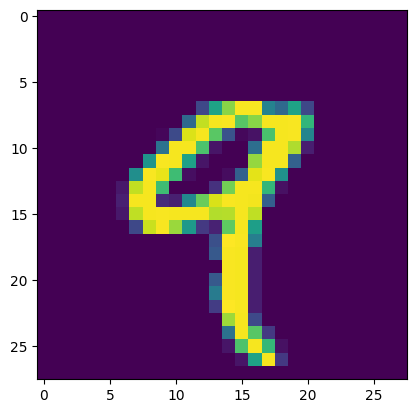

In [383]:
a = D_list[9][0][1::].reshape(28*28)
a = a.reshape(28,28)
plt.imshow(a)

In [320]:
del D0, D1, D2, D3, D4, D5, D6, D7, D8, D9, trainX, trainy

## binary classification

In [321]:
learning_rate = 0.05
iterations = 20
Y_binary = []
X_binary = []
for d0, d1 in zip(D_list[0], D_list[1]):
    X_binary.append(d0)
    Y_binary.append(0)
    X_binary.append(d1)
    Y_binary.append(1)

Y_binary = np.array(Y_binary)
X_binary = np.array(X_binary)
print(Y_binary)
print(X_binary.shape)
theta_binary = np.zeros(D_list[0].shape[1])

theta_binary_final, cost_binary_history, theta_binary_history = gradientDescent(
    X_binary, Y_binary, theta_binary, learning_rate, iterations, True)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
(200, 785)
Epoch 1/20:  CE: 0.6931471806
Epoch 2/20:  CE: 0.5396482595
Epoch 3/20:  CE: 0.4481830594
Epoch 4/20:  CE: 0.3835303451
Epoch 5/20:  CE: 0.3347749413
Epoch 6/20:  CE: 0.2967712411
Epoch 7/20:  CE: 0.2664369638
Epoch 8/20:  CE: 0.2417439157
Epoch 9/20:  CE: 0.2212991911
Epoch 10/20:  CE: 0.2041195497
Epoch 11/20:  CE: 0.1894952292
Epoch 12/20:  CE: 0.1769035548
Epoch 13/20:  CE: 0.1659525500
Epoch 14/20:  CE: 0.1563433134
Epoch 15/20:  CE: 0.1478444182
Epoch 16/20:  CE: 0.1402741724
Epoch 17/20:  CE: 0.1334881095
Epoch 18/20:  CE: 0.1273700238
Epoch 19/20:  CE: 0.1218254479
Ep

Text(0.5, 1.0, 'Values of Cost Function over iterations of Gradient Descent')

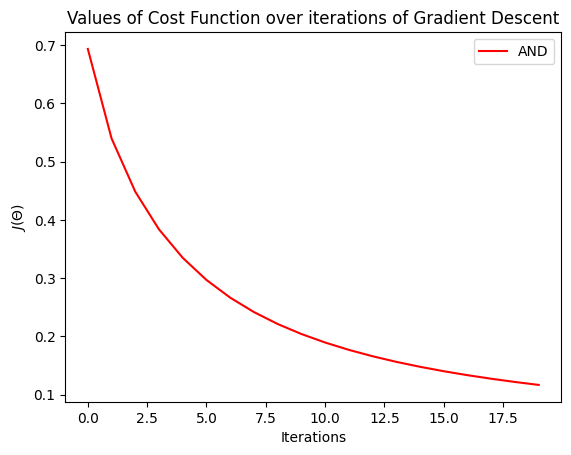

In [322]:
plt.plot(cost_binary_history, color='red', label='AND')
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.legend()
plt.title("Values of Cost Function over iterations of Gradient Descent")

In [323]:
# plt.plot(theta_binary_final, color='red', label='binary')
# plt.xlabel("Iterations")
# plt.ylabel("$J(\Theta)$")
# plt.legend()
# plt.title("Values of Cost Function over iterations of Gradient Descent")

In [333]:
hypothesis(theta_binary_final, D_list[1])

array([0.90962503, 0.87202045, 0.82658883, 0.85315645, 0.90648289,
       0.61773151, 0.90319481, 0.90171665, 0.91967603, 0.75660996,
       0.86330852, 0.92050633, 0.93264848, 0.88371297, 0.85275676,
       0.76668228, 0.93224674, 0.88910147, 0.93349766, 0.84304908,
       0.93272761, 0.59257696, 0.89368047, 0.88550739, 0.93805331,
       0.86505317, 0.84743621, 0.90093296, 0.90947011, 0.93486067,
       0.93625627, 0.4936448 , 0.92756562, 0.84259791, 0.94169437,
       0.91754795, 0.80283977, 0.87290965, 0.91783532, 0.90141735,
       0.87564259, 0.93360474, 0.92615472, 0.92396759, 0.93028808,
       0.94548817, 0.81778237, 0.85568184, 0.89939525, 0.77487749,
       0.91548169, 0.83035488, 0.81529918, 0.88459721, 0.94870281,
       0.90448927, 0.90794633, 0.89331142, 0.84948868, 0.92653303,
       0.86040576, 0.66475121, 0.88306862, 0.82887297, 0.787852  ,
       0.92415863, 0.90170723, 0.89535348, 0.87439329, 0.77532766,
       0.80914087, 0.88083556, 0.82891296, 0.88641686, 0.92514

## multi-class classification

In [325]:
theta_list = [np.zeros(i.shape[1]) for i in D_list]

XD = []
YD = []
for i in range(10):
    D_list_2 = D_list.copy()
    xd_i = D_list_2.pop(i)
    YD_i = np.ones(D_list[i].shape[0])
    for j in D_list_2:
        xd_i = np.vstack((xd_i, j[:10]))
        YD_i = np.concatenate((YD_i, np.zeros(j[:10].shape[0])))
    XD.append(xd_i)
    YD.append(YD_i)
    print("xd-", i, xd_i.shape, YD_i.shape)

xd- 0 (190, 785) (190,)
xd- 1 (190, 785) (190,)
xd- 2 (190, 785) (190,)
xd- 3 (190, 785) (190,)
xd- 4 (190, 785) (190,)
xd- 5 (190, 785) (190,)
xd- 6 (190, 785) (190,)
xd- 7 (190, 785) (190,)
xd- 8 (190, 785) (190,)
xd- 9 (190, 785) (190,)


In [326]:
learning_rate = 0.5
iterations = 100
theta_final_list = []
cost_history_list = []
for i, (XD_I, YD_I, theta_I) in enumerate(zip(XD, YD, theta_list)):
    theta_I_final, cost_I_history, _ = gradientDescent(
        XD_I, YD_I, theta_I, learning_rate, iterations, False)
    theta_final_list.append(theta_I_final)
    cost_history_list.append(cost_I_history)
    print(f"XD-{i} const:{cost_I_history[-1]:.10f}")

XD-0 const:0.0177085511
XD-1 const:0.0374454818
XD-2 const:0.0508379940
XD-3 const:0.0626160887
XD-4 const:0.0316584484
XD-5 const:0.1041399393
XD-6 const:0.0283098279
XD-7 const:0.0411553454
XD-8 const:0.0920569019
XD-9 const:0.1012012066


Text(0.5, 1.0, 'Values of Cost Function over iterations of Gradient Descent')

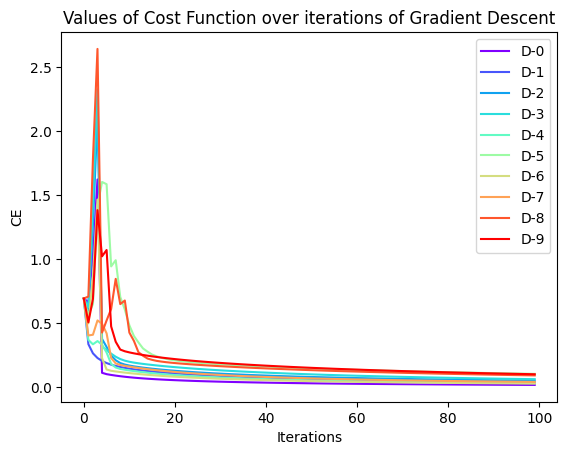

In [327]:
color = plt.cm.rainbow(np.linspace(0, 1, 10))
for i, (cost, c) in enumerate(zip(cost_history_list, color)):
    plt.plot(cost, color=c, label=f'D-{i}')

plt.xlabel("Iterations")
plt.ylabel("CE")
plt.legend()
plt.title("Values of Cost Function over iterations of Gradient Descent")

In [328]:
# for i, (theta, c) in enumerate(zip(theta_final_list, color)):
#     plt.plot(theta, color=c, label=f'D-{i}')
# plt.xlabel("Iterations")
# plt.ylabel("$J(\Theta)$")
# plt.legend()
# plt.title("Values of Cost Function over iterations of Gradient Descent")

In [329]:
def multi_Class(theta_final_list, X):
    out = []
    for theta in theta_final_list:
        out.append(hypothesis(theta, X))
    return out

In [330]:
out = multi_Class(theta_final_list,D_list[0])
out = np.array(out)
np.argmax(out.T,axis=1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 6, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)